# Semester 1 Project Submission



## Elliot

In [11]:
# Your code here - remember to use markdown cells for comments as well!

## Ian

In [12]:
# Your code here - remember to use markdown cells for comments as well!

## Frida

In [13]:
# Importing
import pandas as pd

In [14]:
# Reading the "Movie info" file
movie_info_df = pd.read_csv('databases/rt.movie_info.tsv', sep='\t', encoding = 'utf-8', index_col=0)
movie_info_df.head()

synopsis rating  \
id                                                             
1   This gritty, fast-paced, and innovative police...      R   
3   New York City, not-too-distant-future: Eric Pa...      R   
5   Illeana Douglas delivers a superb performance ...      R   
6   Michael Douglas runs afoul of a treacherous su...      R   
7                                                 NaN     NR   

                                  genre          director  \
id                                                          
1   Action and Adventure|Classics|Drama  William Friedkin   
3     Drama|Science Fiction and Fantasy  David Cronenberg   
5     Drama|Musical and Performing Arts    Allison Anders   
6            Drama|Mystery and Suspense    Barry Levinson   
7                         Drama|Romance    Rodney Bennett   

                             writer  theater_date      dvd_date currency  \
id                                                                         
1                    Ernest Tidyman   Oct 9, 1971  Sep 25, 2001      NaN   
3      David Cronenberg|Don DeLillo  Aug 17, 2012   Jan 1, 2013        $   
5                    Allison Anders  Sep 13, 1996  Apr 18, 2000      NaN   
6   Paul Attanasio|Michael Crichton   Dec 9, 1994  Aug 27, 1997      NaN   
7                      Giles Cooper           NaN           NaN      NaN   

   box_office      runtime             studio  
id                                             
1         NaN  104 minutes                NaN  
3     600,000  108 minutes  Entertainment One  
5         NaN  116 minutes                NaN  
6         NaN  128 minutes                NaN  
7         NaN  200 minutes                NaN

### Data Cleaning

In [15]:
# Data frame overview. Column information, name-data type.
movie_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [16]:
# Column information, name-data type.
movie_info_df.describe()

synopsis rating  genre  \
count                                                1498   1557   1552   
unique                                               1497      6    299   
top     A group of air crash survivors are stranded in...      R  Drama   
freq                                                    2    521    151   

                director       writer theater_date     dvd_date currency  \
count               1361         1111         1201         1201      340   
unique              1125         1069         1025          717        1   
top     Steven Spielberg  Woody Allen  Jan 1, 1987  Jun 1, 2004        $   
freq                  10            4            8           11      340   

       box_office     runtime              studio  
count         340        1530                 494  
unique        336         142                 200  
top       200,000  90 minutes  Universal Pictures  
freq            2          72                  35

In [17]:
# Missing values
movie_info_df.isna().sum()

synopsis          62
rating             3
genre              8
director         199
writer           449
theater_date     359
dvd_date         359
currency        1220
box_office      1220
runtime           30
studio          1066
dtype: int64

In [18]:
# Removing duplicate records
movie_info_df = movie_info_df.drop_duplicates()

In [19]:
# Changing NaN values for String "Not Available"
movie_info_df['synopsis'] = movie_info_df['synopsis'].fillna('Not Available')
movie_info_df['rating'] = movie_info_df['rating'].fillna('Not Available')
movie_info_df['genre'] = movie_info_df['genre'].fillna('Not Available')
movie_info_df['director'] = movie_info_df['director'].fillna('Not Available')
movie_info_df['theater_date'] = movie_info_df['theater_date'].fillna('Not Available')
movie_info_df['dvd_date'] = movie_info_df['dvd_date'].fillna('Not Available')
movie_info_df['runtime'] = movie_info_df['runtime'].fillna('Not Available')
movie_info_df['studio'] = movie_info_df['studio'].fillna('Not Available')
movie_info_df['writer'] = movie_info_df['writer'].fillna('Not Available')

In [20]:
# Changing NaN values for 0 in Box Office column
movie_info_df['box_office'] = movie_info_df['box_office'].fillna(0)

# Remmoving commas from Box Office values
movie_info_df['box_office'] = movie_info_df['box_office'].replace({',':''}, regex=True)

# Converting Box Office values into Integers
movie_info_df['box_office'] = movie_info_df['box_office'].astype(float)

In [21]:
# Checking possible Currency values
currency_values = set(movie_info_df.loc[:,"currency"])
currency_values

# Changing NaN values for "$" in Currency column
movie_info_df['currency'] = movie_info_df['currency'].fillna('$')

# Confirming that there in no more NaN values 
movie_info_df.isna().sum()

synopsis        0
rating          0
genre           0
director        0
writer          0
theater_date    0
dvd_date        0
currency        0
box_office      0
runtime         0
studio          0
dtype: int64

In [22]:
# Movies with highest earnings
box_o = movie_info_df.sort_values('box_office')
box_o.head(5)

synopsis rating  \
id                                                               
1     This gritty, fast-paced, and innovative police...      R   
1271  In 2003, respected filmmaker and screenwriter ...      R   
1270                                      Not Available     NR   
1267                                      Not Available     NR   
1266  Slow-moving and dark, this Klute clone stars T...      R   

                                                  genre          director  \
id                                                                          
1                   Action and Adventure|Classics|Drama  William Friedkin   
1271                                             Horror     Paul Schrader   
1270                  Art House and International|Drama           Xie Jin   
1267  Action and Adventure|Kids and Family|Science F...       Guy Ritchie   
1266                         Drama|Mystery and Suspense     Gordon Willis   

                       writer   theater_date       dvd_date currency  \
id                                                                     
1              Ernest Tidyman    Oct 9, 1971   Sep 25, 2001        $   
1271            Not Available   May 20, 2005   Oct 25, 2005        $   
1270               Yanzhou Lu  Not Available  Not Available        $   
1267  John August|Guy Ritchie  Not Available  Not Available        $   
1266            Not Available  Not Available  Not Available        $   

      box_office        runtime         studio  
id                                              
1            0.0    104 minutes  Not Available  
1271         0.0    111 minutes  Not Available  
1270         0.0    120 minutes  Not Available  
1267         0.0  Not Available  Not Available  
1266         0.0     96 minutes  Not Available

In [23]:
#type(movie_info_df.loc[1,"theater_date"])
m = movie_info_df["theater_date"].str.split()
m

id
1        [Oct, 9,, 1971]
3       [Aug, 17,, 2012]
5       [Sep, 13,, 1996]
6        [Dec, 9,, 1994]
7       [Not, Available]
              ...       
1996    [Aug, 18,, 2006]
1997    [Jul, 23,, 1993]
1998     [Jan, 1,, 1962]
1999     [Apr, 1,, 1993]
2000    [Sep, 27,, 2001]
Name: theater_date, Length: 1556, dtype: object

## Enrique

From the Data obtained above, we call it in order to work with it:

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [25]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()

#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)

#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])

#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()

#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()

#convert genre_ids to name
#df.where()

tmdb_movie_db

genre_ids      id original_language  popularity release_date  \
0          [12, 14, 10751]   12444                en      33.533   2010-11-19   
1      [14, 12, 16, 10751]   10191                en      28.734   2010-03-26   
2            [12, 28, 878]   10138                en      28.515   2010-05-07   
3          [16, 35, 10751]     862                en      28.005   1995-11-22   
4            [28, 878, 12]   27205                en      27.920   2010-07-16   
...                    ...     ...               ...         ...          ...   
26512             [27, 18]  488143                en       0.600   2018-10-13   
26513             [18, 53]  485975                en       0.600   2018-05-01   
26514         [14, 28, 12]  381231                en       0.600   2018-10-01   
26515      [10751, 12, 28]  366854                en       0.600   2018-06-22   
26516             [53, 27]  309885                en       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[25497 rows x 8 columns]

In [26]:
#read tmdb file, make sure values are in the same format, and drop null values
tmdb_movie_db = pd.read_csv('databases/tmdb.movies.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tmdb_movie_db.dropna()

#drop extra title column
tmdb_movie_db = tmdb_movie_db.drop('original_title', axis = 1)

#standardize release date into date format
tmdb_movie_db['release_date'] = pd.to_datetime(tmdb_movie_db['release_date'])

#strip whitespace from title
tmdb_movie_db['title'] = tmdb_movie_db['title'].str.strip()

#remove duplicates
tmdb_movie_db = tmdb_movie_db.drop_duplicates()

#convert genre_ids to name
#df.where()

tmdb_movie_db

genre_ids      id original_language  popularity release_date  \
0          [12, 14, 10751]   12444                en      33.533   2010-11-19   
1      [14, 12, 16, 10751]   10191                en      28.734   2010-03-26   
2            [12, 28, 878]   10138                en      28.515   2010-05-07   
3          [16, 35, 10751]     862                en      28.005   1995-11-22   
4            [28, 878, 12]   27205                en      27.920   2010-07-16   
...                    ...     ...               ...         ...          ...   
26512             [27, 18]  488143                en       0.600   2018-10-13   
26513             [18, 53]  485975                en       0.600   2018-05-01   
26514         [14, 28, 12]  381231                en       0.600   2018-10-01   
26515      [10751, 12, 28]  366854                en       0.600   2018-06-22   
26516             [53, 27]  309885                en       0.600   2018-10-05   

                                              title  vote_average  vote_count  
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1                          How to Train Your Dragon           7.7        7610  
2                                        Iron Man 2           6.8       12368  
3                                         Toy Story           7.9       10174  
4                                         Inception           8.3       22186  
...                                             ...           ...         ...  
26512                         Laboratory Conditions           0.0           1  
26513                               _EXHIBIT_84xxx_           0.0           1  
26514                                  The Last One           0.0           1  
26515                                  Trailer Made           0.0           1  
26516                                    The Church           0.0           1  

[25497 rows x 8 columns]

In [27]:
#read tn file, make sure values are in the same format, and drop null values
tn_movie_db = pd.read_csv('databases/tn.movie_budgets.csv', na_filter=True, na_values='[]', encoding = 'utf-8', index_col = 0)
tn_movie_db.dropna()

#standardize release date into date format
tn_movie_db['release_date'] = pd.to_datetime(tn_movie_db['release_date'])

#strip whitespace from title
tn_movie_db['movie'] = tn_movie_db['movie'].str.strip()

#strip $
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].str.strip('$')
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].str.strip('$')
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].str.strip('$')

#remove ,
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].replace(",", "", regex=True)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].replace(",", "", regex=True)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].replace(",", "", regex=True)

#convert to integers
tn_movie_db['production_budget'] = tn_movie_db['production_budget'].astype(int)
tn_movie_db['domestic_gross'] = tn_movie_db['domestic_gross'].astype(int)
tn_movie_db['worldwide_gross'] = tn_movie_db['worldwide_gross'].astype(float)

#create metric ratios
tn_movie_db['dom_gross / budget'] = tn_movie_db['domestic_gross'] / tn_movie_db['production_budget']
tn_movie_db['ww_gross / budget'] = tn_movie_db['worldwide_gross'] / tn_movie_db['production_budget']
tn_movie_db['dom_profit'] = tn_movie_db['domestic_gross'] - tn_movie_db['production_budget']
tn_movie_db['profit'] = tn_movie_db['worldwide_gross'] - tn_movie_db['production_budget']

tn_movie_db

release_date                                        movie  \
id                                                             
1    2009-12-18                                       Avatar   
2    2011-05-20  Pirates of the Caribbean: On Stranger Tides   
3    2019-06-07                                 Dark Phoenix   
4    2015-05-01                      Avengers: Age of Ultron   
5    2017-12-15            Star Wars Ep. VIII: The Last Jedi   
..          ...                                          ...   
78   2018-12-31                                       Red 11   
79   1999-04-02                                    Following   
80   2005-07-13                Return to the Land of Wonders   
81   2015-09-29                         A Plague So Pleasant   
82   2005-08-05                            My Date With Drew   

    production_budget  domestic_gross  worldwide_gross  dom_gross / budget  \
id                                                                           
1           425000000       760507625     2.776345e+09            1.789430   
2           410600000       241063875     1.045664e+09            0.587101   
3           350000000        42762350     1.497624e+08            0.122178   
4           330600000       459005868     1.403014e+09            1.388403   
5           317000000       620181382     1.316722e+09            1.956408   
..                ...             ...              ...                 ...   
78               7000               0     0.000000e+00            0.000000   
79               6000           48482     2.404950e+05            8.080333   
80               5000            1338     1.338000e+03            0.267600   
81               1400               0     0.000000e+00            0.000000   
82               1100          181041     1.810410e+05          164.582727   

    ww_gross / budget  dom_profit        profit  
id                                               
1            6.532577   335507625  2.351345e+09  
2            2.546673  -169536125  6.350639e+08  
3            0.427892  -307237650 -2.002376e+08  
4            4.243841   128405868  1.072414e+09  
5            4.153696   303181382  9.997217e+08  
..                ...         ...           ...  
78           0.000000       -7000 -7.000000e+03  
79          40.082500       42482  2.344950e+05  
80           0.267600       -3662 -3.662000e+03  
81           0.000000       -1400 -1.400000e+03  
82         164.582727      179941  1.799410e+05  

[5782 rows x 9 columns]

In [28]:
#merge title and movie name
tn_movie_db = tn_movie_db.rename(columns = {"movie":"title"})

#special cases where movie titles do not match
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part I' : 'Harry Potter and the Deathly Hallows: Part 1'}, inplace=True)
tn_movie_db['title'].replace({'Harry Potter and the Deathly Hallows: Part II' : 'Harry Potter and the Deathly Hallows: Part 2'}, inplace=True)
tmdb_movie_db['title'].replace({'Fast & Furious 6':'Fast and Furious 6'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Force Awakens' : 'Star Wars Ep. VII: The Force Awakens'}, inplace=True)
tn_movie_db['title'].replace({'Star Wars: The Last Jedi' : 'Star Wars Ep. VIII: The Last Jedi'}, inplace=True)

#merge databases
movie_db = tmdb_movie_db.merge(tn_movie_db, how = 'left')

#drop null values
movie_db.dropna()

genre_ids      id original_language  popularity release_date  \
0          [12, 14, 10751]   12444                en      33.533   2010-11-19   
1      [14, 12, 16, 10751]   10191                en      28.734   2010-03-26   
2            [12, 28, 878]   10138                en      28.515   2010-05-07   
3          [16, 35, 10751]     862                en      28.005   1995-11-22   
4            [28, 878, 12]   27205                en      27.920   2010-07-16   
...                    ...     ...               ...         ...          ...   
23711         [53, 18, 27]  510284                en       5.972   2019-02-01   
23747          [18, 10752]  514407                en       5.599   2018-10-26   
23795         [18, 28, 80]  547590                en       5.274   2019-05-03   
23907     [18, 35, 28, 80]  506971                ur       4.486   2018-07-20   
24219         [28, 12, 16]  332718                en       2.707   2018-02-02   

                                              title  vote_average  vote_count  \
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                          How to Train Your Dragon           7.7        7610   
2                                        Iron Man 2           6.8       12368   
3                                         Toy Story           7.9       10174   
4                                         Inception           8.3       22186   
...                                             ...           ...         ...   
23711                                         Braid           6.4          18   
23747                                   Indivisible           5.4          13   
23795                                    El Chicano           9.0           1   
23907                              Teefa in Trouble           7.6          11   
24219                    Bilal: A New Breed of Hero           6.8          54   

       production_budget  domestic_gross  worldwide_gross  dom_gross / budget  \
0            125000000.0     296131568.0      960431568.0            2.369053   
1            165000000.0     217581232.0      494870992.0            1.318674   
2            170000000.0     312433331.0      621156389.0            1.837843   
3             30000000.0     191796233.0      364545516.0            6.393208   
4            160000000.0     292576195.0      835524642.0            1.828601   
...                  ...             ...              ...                 ...   
23711          1660000.0             0.0          80745.0            0.000000   
23747          2700000.0       3511417.0        3588305.0            1.300525   
23795          8000000.0        700261.0         700261.0            0.087533   
23907          1500000.0             0.0          98806.0            0.000000   
24219         30000000.0        490973.0         648599.0            0.016366   

       ww_gross / budget   dom_profit       profit  
0               7.683453  171131568.0  835431568.0  
1               2.999218   52581232.0  329870992.0  
2               3.653861  142433331.0  451156389.0  
3              12.151517  161796233.0  334545516.0  
4               5.222029  132576195.0  675524642.0  
...                  ...          ...          ...  
23711           0.048642   -1660000.0   -1579255.0  
23747           1.329002     811417.0     888305.0  
23795           0.087533   -7299739.0   -7299739.0  
23907           0.065871   -1500000.0   -1401194.0  
24219           0.021620  -29509027.0  -29351401.0  

[1271 rows x 15 columns]

In [30]:
#remove values that have 0 in the domestic_gross column
new_movie_db = movie_db.drop(movie_db[movie_db['domestic_gross'] < 1].index)
new_movie_db

genre_ids      id original_language  popularity release_date  \
0          [12, 14, 10751]   12444                en      33.533   2010-11-19   
1      [14, 12, 16, 10751]   10191                en      28.734   2010-03-26   
2            [12, 28, 878]   10138                en      28.515   2010-05-07   
3          [16, 35, 10751]     862                en      28.005   1995-11-22   
4            [28, 878, 12]   27205                en      27.920   2010-07-16   
...                    ...     ...               ...         ...          ...   
25492             [27, 18]  488143                en       0.600   2018-10-13   
25493             [18, 53]  485975                en       0.600   2018-05-01   
25494         [14, 28, 12]  381231                en       0.600   2018-10-01   
25495      [10751, 12, 28]  366854                en       0.600   2018-06-22   
25496             [53, 27]  309885                en       0.600   2018-10-05   

                                              title  vote_average  vote_count  \
0      Harry Potter and the Deathly Hallows: Part 1           7.7       10788   
1                          How to Train Your Dragon           7.7        7610   
2                                        Iron Man 2           6.8       12368   
3                                         Toy Story           7.9       10174   
4                                         Inception           8.3       22186   
...                                             ...           ...         ...   
25492                         Laboratory Conditions           0.0           1   
25493                               _EXHIBIT_84xxx_           0.0           1   
25494                                  The Last One           0.0           1   
25495                                  Trailer Made           0.0           1   
25496                                    The Church           0.0           1   

       production_budget  domestic_gross  worldwide_gross  dom_gross / budget  \
0            125000000.0     296131568.0      960431568.0            2.369053   
1            165000000.0     217581232.0      494870992.0            1.318674   
2            170000000.0     312433331.0      621156389.0            1.837843   
3             30000000.0     191796233.0      364545516.0            6.393208   
4            160000000.0     292576195.0      835524642.0            1.828601   
...                  ...             ...              ...                 ...   
25492                NaN             NaN              NaN                 NaN   
25493                NaN             NaN              NaN                 NaN   
25494                NaN             NaN              NaN                 NaN   
25495                NaN             NaN              NaN                 NaN   
25496                NaN             NaN              NaN                 NaN   

       ww_gross / budget   dom_profit       profit  
0               7.683453  171131568.0  835431568.0  
1               2.999218   52581232.0  329870992.0  
2               3.653861  142433331.0  451156389.0  
3              12.151517  161796233.0  334545516.0  
4               5.222029  132576195.0  675524642.0  
...                  ...          ...          ...  
25492                NaN          NaN          NaN  
25493                NaN          NaN          NaN  
25494                NaN          NaN          NaN  
25495                NaN          NaN          NaN  
25496                NaN          NaN          NaN  

[25431 rows x 15 columns]

In [29]:
#check to see if worldwide_gross and domestic_gross is 0 to remove outliers
dcount = 0
for x in movie_db['domestic_gross']:
    if x == 0:
        dcount += 1
print(dcount)

wwcount = 0
for x in movie_db['worldwide_gross']:
    if x == 0:
        wwcount += 1
print(wwcount)

66
41


# Which genres of movies are the most profitable?



In [31]:
new_movie_db.dtypes

genre_ids                     object
id                             int64
original_language             object
popularity                   float64
release_date          datetime64[ns]
title                         object
vote_average                 float64
vote_count                     int64
production_budget            float64
domestic_gross               float64
worldwide_gross              float64
dom_gross / budget           float64
ww_gross / budget            float64
dom_profit                   float64
profit                       float64
dtype: object

In [32]:
new_movie_db['popularity'].describe()

count    25431.000000
mean         3.035796
std          4.259394
min          0.600000
25%          0.600000
50%          1.316000
75%          3.454000
max         80.773000
Name: popularity, dtype: float64

In [33]:
new_movie_db['ww_gross / budget'].describe()

count    1206.000000
mean        4.290044
std        13.670360
min         0.001056
25%         1.129462
50%         2.355640
75%         4.172148
max       416.564740
Name: ww_gross / budget, dtype: float64

In [34]:
new_movie_db['dom_gross / budget'].describe()

count    1206.000000
mean        2.199167
std         7.481968
min         0.000031
25%         0.486047
50%         1.041030
75%         2.106781
max       227.644100
Name: dom_gross / budget, dtype: float64

In [35]:
new_movie_db['genre_ids'].describe()

count     22970
unique     2470
top        [99]
freq       3564
Name: genre_ids, dtype: object

In [36]:
new_movie_db.value_counts('genre_ids').nlargest(12)

genre_ids
[99]           3564
[18]           2116
[35]           1619
[27]           1124
[53]            465
[35, 18]        422
[10402]         398
[27, 53]        353
[18, 10749]     333
[18, 35]        273
[35, 10749]     259
[16]            244
dtype: int64

In [37]:
new_movie_db.value_counts('popularity').nlargest(12)

popularity
0.600    6916
1.400     632
0.840     569
0.624     104
0.625      90
1.960      75
0.626      67
0.628      63
0.655      60
0.631      56
0.627      54
0.654      54
dtype: int64

In [38]:
dfg = new_movie_db.groupby(['release_date', 'genre_ids']).agg({'profit': sum}).reset_index()
dfg

release_date                     genre_ids  profit
0       1930-04-29                   [18, 10752]     0.0
1       1933-01-21                      [27, 53]     0.0
2       1936-02-27               [35, 18, 10749]     0.0
3       1946-12-25               [18, 36, 10749]     0.0
4       1949-02-17                      [18, 53]     0.0
...            ...                           ...     ...
18926   2019-05-17                [18, 9648, 53]     0.0
18927   2019-05-17                          [18]     0.0
18928   2019-06-28                   [10749, 18]     0.0
18929   2019-06-28                          [99]     0.0
18930   2020-12-25  [27, 80, 80, 80, 80, 80, 80]     0.0

[18931 rows x 3 columns]

We couldn’t start without having a look at what genres make the most money. There are many types of genre, each averaging a wide distribution of profit since 2010. Based on the data available, we tried to obtain the the top 5 averaging film genres were Adventure, War, Action, Fantasy and Family. Interestingly, Adventure films tend to average more than twice as much profit to Thriller, Animation and Documentary. The average of profit was taken to account for the number of films produced in each genre. We assumed that the mean would be the most reliable average with the data we had, and one prblem was to establish a single genre for each film.

Text(0.5, 1.0, 'Distribution of genre in Raw Data')

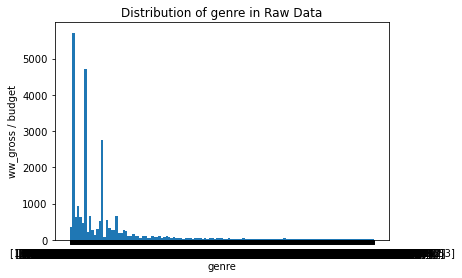

In [26]:
fig, ax = plt.subplots()
ax.hist(movie_db['genre_ids'], bins='auto')
ax.set_xlabel('genre')
ax.set_ylabel('ww_gross / budget')
ax.set_title('Distribution of genre in Raw Data')

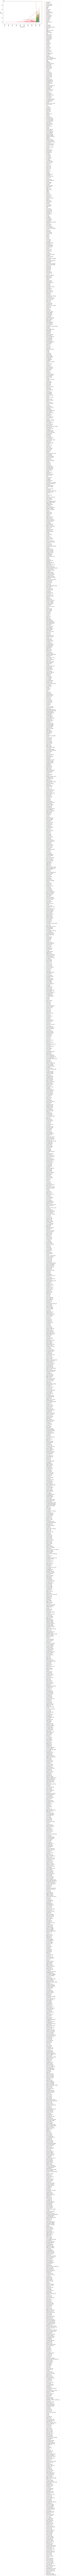

In [39]:
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(x='release_date', y='profit', data=dfg, hue='genre_ids')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.hist(movie_db['genre_ids'], bins='auto')
ax.set_xlabel('genre')
ax.set_ylabel('ww_gross / budget')
ax.set_title('Distribution of genre in Raw Data')

Our recommendation would be, if you are looking for a gamble then Adventure, War, Action and Fantasy could produce some great results. The leading profit genres (Action, Drama, Adventure) paint the more reliable story, and genre Action appears to be increasing in popularity.

Beside here we try to find a correlation of what we have stated in the graphs above.

H0 = there's a significative correlation between genre, the ratios and popularity (worlwide_gross/production_rate, dom_gross / budget and popularity)

H1 = there's not a significative correlation between genre,the ratios and popularity (worlwide_gross/production_rate and dom_gross / budget and popularity)

ANOVA is the most appropriate technique since we are trying to determine whether there is a difference in genre across 3 categories.

If we only had 2 categories, a t-test would be appropriate, but we want to use ANOVA because there are 3

In [ ]:
#import statsmodels.api as sm
#from statsmodels.formula.api import ols

#formula = 'none'
#lm = ols(formula, movie_db).fit()
#sm.stats.anova_lm(lm)

Preparation, modelling, visualisation and interpretation of the data, allowed us to conduct analysis of the movies that have been created since 2010.

- Adventure films on average are the most profitable
- The industry leaders preferred creating Action, Drama & Comedy films

## John

In [ ]:
hape of passed values is (31179, 15), indices imply (25497, 15)


In [ ]:
# Your code here - remember to use markdown cells for comments as well!